In [1]:
#再變數後面按快捷鍵tab,有屬性或欄位提示
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import np_utils
from keras import optimizers
from keras import regularizers
from keras.datasets import mnist
from keras.backend.tensorflow_backend import set_session
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

#跑GPU版本的tensorflow時可能會因為獨顯內存不夠而跑不起來,比如說同時開了遊戲或TeamView等,所以以下code是先分配好獨顯內存避免不夠用
config = tf.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config)) 

np.random.seed(1)

Using TensorFlow backend.


In [2]:
#其實model.fit本來就會回傳記錄曲線圖
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'center right')
    plt.show()

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 0


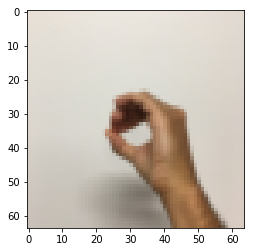

In [4]:
index = 0
plt.imshow(X_test_orig[index])
print ("y = " + str(np.squeeze(Y_test_orig[:, index])))

In [5]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1)
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1)
# Normalize image vectors
X_train = X_train_flatten / 255.
X_test = X_test_flatten / 255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 12288)
Y_train shape: (6, 1080)
X_test shape: (120, 12288)
Y_test shape: (6, 120)


In [6]:
model = Sequential()#宣告一個model
#input layer
model.add(Dense(25, input_dim=64*64*3, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
#model.add(Dropout(0.2))
#hidden layer
model.add(Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
#model.add(Dropout(0.2))
#output layer
model.add(Dense(6, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))

In [7]:
#成本函數使用cross entropy
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#打印模型
model.summary()

#紀錄更新過程
#history = LossHistory()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                307225    
_________________________________________________________________
dense_2 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 78        
Total params: 307,615
Trainable params: 307,615
Non-trainable params: 0
_________________________________________________________________


In [8]:
#mini_batch: 隨機挑32張圖片作為一個batch, 所有batch看1500次
#validation_split: 分配作為驗證資料的比例, 以這次作業來,就是有1080*0.8張作訓練,1080*0.2張來驗證
train_history = model.fit(
    x = X_train, 
    y = Y_train.T, 
    validation_data = (X_test, Y_test.T), 
    validation_split = 0.2, 
    epochs = 200, 
    batch_size = 200, 
    verbose = 2)

Train on 1080 samples, validate on 120 samples
Epoch 1/200
 - 1s - loss: 1.8370 - acc: 0.1713 - val_loss: 1.8058 - val_acc: 0.1667
Epoch 2/200
 - 0s - loss: 1.8059 - acc: 0.1769 - val_loss: 1.7904 - val_acc: 0.1750
Epoch 3/200
 - 0s - loss: 1.7923 - acc: 0.1778 - val_loss: 1.7790 - val_acc: 0.3167
Epoch 4/200
 - 0s - loss: 1.7794 - acc: 0.2546 - val_loss: 1.7698 - val_acc: 0.3000
Epoch 5/200
 - 0s - loss: 1.7707 - acc: 0.2870 - val_loss: 1.7654 - val_acc: 0.2667
Epoch 6/200
 - 0s - loss: 1.7705 - acc: 0.2074 - val_loss: 1.7605 - val_acc: 0.2917
Epoch 7/200
 - 0s - loss: 1.7661 - acc: 0.2704 - val_loss: 1.7658 - val_acc: 0.2333
Epoch 8/200
 - 0s - loss: 1.7625 - acc: 0.2343 - val_loss: 1.7542 - val_acc: 0.3083
Epoch 9/200
 - 0s - loss: 1.7530 - acc: 0.2778 - val_loss: 1.7459 - val_acc: 0.2833
Epoch 10/200
 - 0s - loss: 1.7451 - acc: 0.2657 - val_loss: 1.7377 - val_acc: 0.3417
Epoch 11/200
 - 0s - loss: 1.7345 - acc: 0.3398 - val_loss: 1.7303 - val_acc: 0.4167
Epoch 12/200
 - 0s - loss: 

Epoch 97/200
 - 0s - loss: 1.3006 - acc: 0.5769 - val_loss: 1.3272 - val_acc: 0.6250
Epoch 98/200
 - 0s - loss: 1.2943 - acc: 0.5796 - val_loss: 1.3360 - val_acc: 0.5417
Epoch 99/200
 - 0s - loss: 1.2910 - acc: 0.5648 - val_loss: 1.3220 - val_acc: 0.6167
Epoch 100/200
 - 0s - loss: 1.2871 - acc: 0.5815 - val_loss: 1.3195 - val_acc: 0.6083
Epoch 101/200
 - 0s - loss: 1.2851 - acc: 0.5870 - val_loss: 1.3187 - val_acc: 0.6250
Epoch 102/200
 - 0s - loss: 1.2820 - acc: 0.5778 - val_loss: 1.3177 - val_acc: 0.5333
Epoch 103/200
 - 0s - loss: 1.2760 - acc: 0.5787 - val_loss: 1.3063 - val_acc: 0.6083
Epoch 104/200
 - 0s - loss: 1.2702 - acc: 0.5944 - val_loss: 1.3026 - val_acc: 0.6083
Epoch 105/200
 - 0s - loss: 1.2645 - acc: 0.5972 - val_loss: 1.2996 - val_acc: 0.5750
Epoch 106/200
 - 0s - loss: 1.2625 - acc: 0.5852 - val_loss: 1.2986 - val_acc: 0.5917
Epoch 107/200
 - 0s - loss: 1.2624 - acc: 0.5917 - val_loss: 1.2939 - val_acc: 0.6083
Epoch 108/200
 - 0s - loss: 1.2544 - acc: 0.5889 - val_lo

Epoch 193/200
 - 0s - loss: 1.0292 - acc: 0.6769 - val_loss: 1.0849 - val_acc: 0.6667
Epoch 194/200
 - 0s - loss: 1.0211 - acc: 0.6769 - val_loss: 1.0839 - val_acc: 0.6917
Epoch 195/200
 - 0s - loss: 1.0211 - acc: 0.6815 - val_loss: 1.1069 - val_acc: 0.6500
Epoch 196/200
 - 0s - loss: 1.0344 - acc: 0.6639 - val_loss: 1.0774 - val_acc: 0.6750
Epoch 197/200
 - 0s - loss: 1.0201 - acc: 0.6685 - val_loss: 1.0857 - val_acc: 0.6833
Epoch 198/200
 - 0s - loss: 1.0139 - acc: 0.6843 - val_loss: 1.0743 - val_acc: 0.6917
Epoch 199/200
 - 0s - loss: 1.0144 - acc: 0.6750 - val_loss: 1.0724 - val_acc: 0.6917
Epoch 200/200
 - 0s - loss: 1.0109 - acc: 0.6713 - val_loss: 1.0723 - val_acc: 0.7000


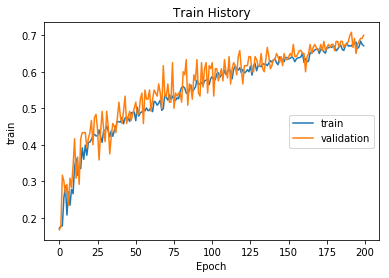

In [9]:
show_train_history(train_history, 'acc', 'val_acc')

In [10]:
score = model.evaluate(X_test, Y_test.T, batch_size=120, verbose=0)
print('Total loss on Testing Set:', score[0])
print('Accuracy of Testing Set:', score[1])

Total loss on Testing Set: 1.0723495483398438
Accuracy of Testing Set: 0.699999988079071


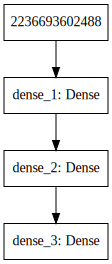

In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#產生模型結構圖.png
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [12]:
import pandas as pd
prediction = model.predict_classes(X_test)
y_label = Y_test_orig.reshape(120,)
pd.crosstab(y_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5
label,,,,,,
0,18,1,0,0,0,1
1,0,17,2,1,0,0
2,1,4,12,1,1,1
3,1,1,2,13,1,2
4,1,0,2,2,13,2
5,3,0,1,3,2,11
